# **SVM - Kernel comparison**

## Kernel interpretation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles

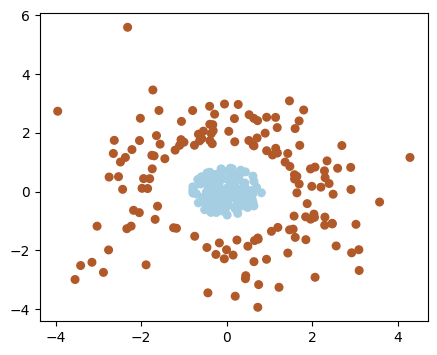

In [2]:
X, y = make_gaussian_quantiles(cov=2,
                                 n_samples = 300 , n_features = 2 ,
                                 n_classes = 2 , random_state = 1)

X[y==0] = X[y==0] * 0.5 #para organizar un poco mas los valores

_, ax= plt.subplots(figsize=(5,4))
plt.scatter( X[:,0] , X[:,1] , c=y , s=30, cmap="Paired")

In [3]:
Xk= X[:,0]**2 + X[:,1]**2 #esto es el kernel
print(Xk.shape)

(300,)


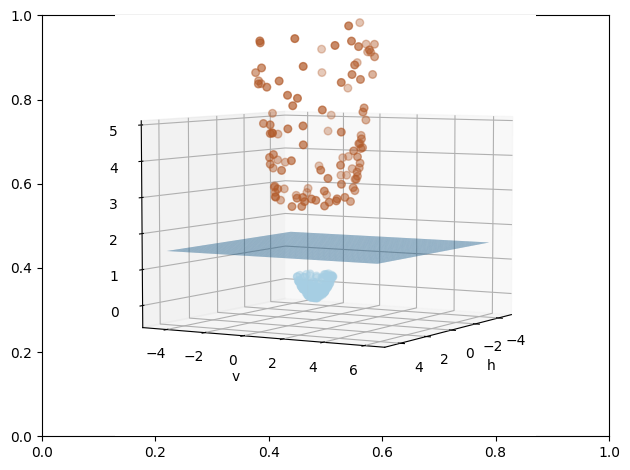

In [4]:
f, _ =plt.subplots()
ax=f.add_subplot(projection='3d')
ax.view_init(5, 30) #para cambiar la proyección
ax.scatter3D( X[:,0] , X[:,1] , Xk , c = y , s=30, cmap="Paired")

#hacer la cuadricula
h_grid, v_grid=np.meshgrid(np.linspace(-4.5,4.5,100), np.linspace(-4.5,6.2,100))
z_grid=np.ones(h_grid.shape)*1.5

#graficamos la superficie
ax.plot_surface(h_grid,v_grid,z_grid, alpha=0.5)
ax.set_xlabel('h'), ax.set_ylabel('v')
ax.set_zlim(-0.5, 5)
plt.tight_layout()

In [5]:
# Sve all figs
import os
os.makedirs('imgs/', exist_ok=True)

for angle in range(0,91,2):
  f,_=plt.subplots()
  ax=f.add_subplot(projection='3d')
  ax.view_init(angle,30)
  ax.scatter3D(X[:,0],X[:,1],Xk,c=y,s=30,cmap='Paired')
  ax.plot_surface(h_grid,v_grid,z_grid,alpha=0.5)
  ax.set_xlabel('h'),ax.set_ylabel('v'),ax.set_zlabel('k')
  ax.set_zlim(0,5)
  plt.savefig('imgs/{0}.png'.format(angle),dpi=200) #guardar el plot como imagen
  plt.clf(),plt.close()

In [6]:
#crear el gif
import os
from PIL import Image
from natsort import natsorted,ns #libreria que es util para el ordenamiento de archivos

images=[]

files_ = natsorted(os.listdir('/content/imgs'),alg=ns.PATH) #el .path organiza los archivos por ruta, el .listdir escanea los archivos
print(len(files_))

# Save a gif
for img in files_:
  image=Image.open('imgs/{0}'.format(img))
  images.append(image)

image.save("kernel_.gif", save_all=True, append_images=images, duration=200, loop=0)

46


## SVM

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.datasets import make_classification



In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# we create 100 separable points
X, Y = make_classification(n_samples = _ , n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=2, random_state=2)
plt.scatter( _ , _ , c = _ , s = _, cmap=plt.cm.Paired)

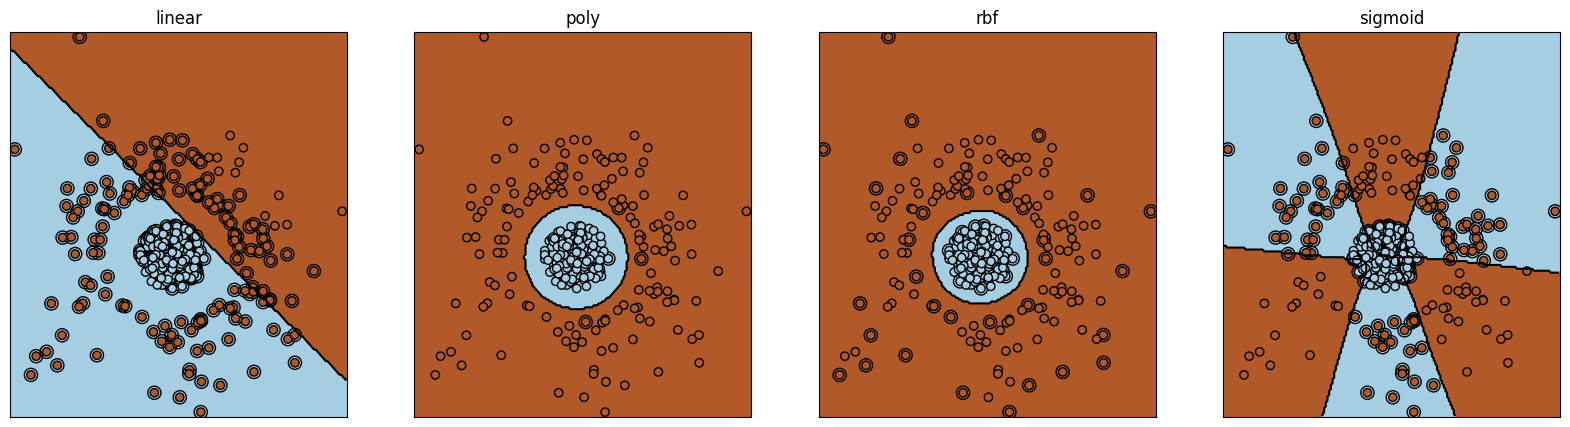

In [10]:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
_, axes = plt.subplots(1, 4, figsize=(20, 5))

# fit the model
for i, kernel in enumerate(kernels):
    clf = SVC(kernel=kernel, gamma=1, degree=2)
    clf.fit(X, y)

    # Determinar los límites del gráfico
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # Crear la cuadrícula
    x_dim, y_dim = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    # Predecir en toda la cuadrícula
    predictions = clf.predict(np.c_[x_dim.ravel(), y_dim.ravel()])
    predictions = predictions.reshape(x_dim.shape)

    # Graficar la cuadrícula y las fronteras de decisión
    axes[i].pcolormesh(x_dim, y_dim, predictions, cmap=plt.cm.Paired, shading='auto')
    axes[i].contour(x_dim, y_dim, predictions, colors=['k'], linestyles=['-'], levels=[0.5])

    # Graficar los puntos de soporte
    axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=90, facecolors='none', edgecolors='k')
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

    # Configurar título y eliminar ejes
    axes[i].set_title(kernel)
    axes[i].set_xticks([])
    axes[i].set_yticks([])

plt.show()


#para hacerlo manual
#x_min, x_max = _ , _
    #y_min, y_max = _ , _

    #x_dim, y_dim = np.meshgrid(np.arange( _ , _ , 0.01), np.arange( _ , _ , 0.01))
    #predictions = clf.predict(np.c_[x_dim.ravel(), y_dim.ravel()])

    #predictions = predictions.reshape( _ )
    #axes[i].pcolormesh( _ , _ , predictions, cmap = plt.cm.Paired)
    #axes[i].contour( _ , _ , predictions, colors=['k', 'k'], linestyles=['-', '-'], levels=[0, 1])

    #axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 90, facecolors = 'none', edgecolors = 'k')

    #axes[i].scatter( _ , _ , c = _ , cmap=plt.cm.Paired, edgecolors='k')
    #axes[i].set_axis_off()

In [ ]:

kernels = ['linear', 'poly', 'rbf']

_, axes = plt.subplots(1,3, figsize = (20,5))

# fit the model
for i, kernel in enumerate(kernels):
    #
    clf = svm.SVC(kernel = _ , gamma = 1)
    clf.fit( _ , _ )

    x_min, x_max = _ , _
    y_min, y_max = _ , _

    x_dim, y_dim = np.meshgrid(np.arange( _ , _ , 0.01), np.arange( _ , _ , 0.01))
    predictions = clf.decision_function(np.c_[x_dim.ravel(), y_dim.ravel()])

    predictions = predictions.reshape(x_dim.shape)
    axes[i].pcolormesh( _ , _ , predictions, cmap = plt.cm.coolwarm)
    axes[i].contourf( _ , _ , predictions, alpha = 0.75, cmap = plt.cm.coolwarm)

    axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 90, facecolors = 'none', edgecolors = 'k')

    axes[i].scatter( _ , _ , c=Y, cmap=plt.cm.coolwarm, edgecolors='k')
    axes[i].set_axis_off()

plt.show()

Create a function that plots the decision boundaries of a given SVM

## In real data

Evaluate the different SVM kernels in the Iris and Fruits datasets